In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/increasing-breast-cancer-awareness/breast_cancer_survival.csv
/kaggle/input/clean-df/clean_df.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
df= pd.read_csv("/kaggle/input/increasing-breast-cancer-awareness/breast_cancer_survival.csv")

In [4]:
df.head()

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,42,FEMALE,0.95256,2.15000,0.007972,-0.048340,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,20-May-18,26-Aug-18,Alive
1,54,FEMALE,0.00000,1.38020,-0.498030,-0.507320,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,26-Apr-18,25-Jan-19,Dead
2,63,FEMALE,-0.52303,1.76400,-0.370190,0.010815,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Lumpectomy,24-Aug-18,08-Apr-20,Alive
3,78,FEMALE,-0.87618,0.12943,-0.370380,0.132190,I,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,16-Nov-18,28-Jul-20,Alive
4,42,FEMALE,0.22611,1.74910,-0.543970,-0.390210,II,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Lumpectomy,12-Dec-18,05-Jan-19,Alive


In [5]:
df=df.dropna(subset='Date_of_Last_Visit')
df=df.reset_index(drop=True)

In [6]:
for i in range(0,len(df)):
    if df['Gender'][i]=="FEMALE":
        df['Gender'][i]=1
    else:
        df.Gender[i]=0
df.Gender=df.Gender.astype(int)

In [7]:
for i in range(0,len(df)):
    if df.Tumour_Stage[i]=='I':
        df.Tumour_Stage[i]=1
    if df.Tumour_Stage[i]=='II':
        df.Tumour_Stage[i]=2
    if df.Tumour_Stage[i]=='III':
        df.Tumour_Stage[i]=3
df.Tumour_Stage=df.Tumour_Stage.astype(int)

In [8]:
df=pd.get_dummies(df, columns=['Histology','Surgery_type'],dtype='int64')

In [9]:

for i in range (0,len(df)):
    if df['HER2 status'][i]=='Positive':
        df['HER2 status'][i]=1
    else:
        df['HER2 status'][i]=0
df['HER2 status']=df['HER2 status'].astype(int)

In [10]:
df.Patient_Status=df.Patient_Status.astype(str)
for i in range(0,len(df)):
    if df.Patient_Status[i]=='Alive'or df.Patient_Status[i]==1:
        df.Patient_Status[i]=1
    if df.Patient_Status[i]=='Dead'or df.Patient_Status[i]==0:
        df.Patient_Status[i]=0
    if df.Patient_Status[i]=='nan':
        df.Patient_Status[i]=np.nan
df.Patient_Status=df.Patient_Status.astype(float)

In [11]:
df.Date_of_Surgery=pd.to_datetime(df.Date_of_Surgery)
df.Date_of_Last_Visit=pd.to_datetime(df.Date_of_Last_Visit)
df['year of surgery']=0
df['month of surgery']=0
df['day of surgery']=0
for i in range(0,len(df)):
    df['year of surgery'][i]=int(str(df.Date_of_Surgery[i]).split('-')[0])
    df['month of surgery'][i]=int(str(df.Date_of_Surgery[i]).split('-')[1])
    df['day of surgery'][i]=int(str(df.Date_of_Surgery[i]).split('-')[2].split()[0])


In [12]:
df['day of last visit']=0
df['month of last visit']=0
df['year of last visit']=0
for i in range(0,len(df)):
    df['year of last visit'][i]=int(str(df.Date_of_Last_Visit[i]).split('-')[0])
    df['month of last visit'][i]=int(str(df.Date_of_Last_Visit[i]).split('-')[1])
    df['day of last visit'][i]=int(str(df.Date_of_Last_Visit[i]).split('-')[2].split()[0])


In [13]:
df=df.drop(columns=['ER status','PR status','Date_of_Surgery','Date_of_Last_Visit'],axis=1)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317 entries, 0 to 316
Data columns (total 22 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Age                                       317 non-null    int64  
 1   Gender                                    317 non-null    int64  
 2   Protein1                                  317 non-null    float64
 3   Protein2                                  317 non-null    float64
 4   Protein3                                  317 non-null    float64
 5   Protein4                                  317 non-null    float64
 6   Tumour_Stage                              317 non-null    int64  
 7   HER2 status                               317 non-null    int64  
 8   Patient_Status                            317 non-null    float64
 9   Histology_Infiltrating Ductal Carcinoma   317 non-null    int64  
 10  Histology_Infiltrating Lobular Carcino

In [15]:
#df.to_csv("clean_df.csv",index=False)

In [16]:
#clean_df=pd.read_csv("/kaggle/input/clean-df/clean_df.csv")
clean_df=df.copy()

In [17]:
clean_df

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,HER2 status,Patient_Status,Histology_Infiltrating Ductal Carcinoma,...,Surgery_type_Lumpectomy,Surgery_type_Modified Radical Mastectomy,Surgery_type_Other,Surgery_type_Simple Mastectomy,year of surgery,month of surgery,day of surgery,day of last visit,month of last visit,year of last visit
0,42,1,0.952560,2.15000,0.007972,-0.048340,2,0,1.0,1,...,0,0,1,0,2018,5,20,26,8,2018
1,54,1,0.000000,1.38020,-0.498030,-0.507320,2,0,0.0,1,...,0,0,1,0,2018,4,26,25,1,2019
2,63,1,-0.523030,1.76400,-0.370190,0.010815,2,0,1.0,1,...,1,0,0,0,2018,8,24,8,4,2020
3,78,1,-0.876180,0.12943,-0.370380,0.132190,1,0,1.0,1,...,0,0,1,0,2018,11,16,28,7,2020
4,42,1,0.226110,1.74910,-0.543970,-0.390210,2,1,1.0,1,...,1,0,0,0,2018,12,12,5,1,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312,59,1,0.024598,1.40050,0.024751,0.280320,2,1,1.0,1,...,1,0,0,0,2019,1,15,27,3,2020
313,41,1,0.100120,-0.46547,0.472370,-0.523870,1,1,1.0,1,...,0,1,0,0,2018,7,25,23,4,2019
314,54,1,0.753820,1.64250,-0.332850,0.857860,2,0,0.0,1,...,0,0,0,1,2019,3,26,11,10,2019
315,74,1,0.972510,1.42680,-0.366570,-0.107820,2,0,1.0,0,...,1,0,0,0,2018,11,26,5,12,2018


In [18]:
clean_df[(clean_df.Patient_Status==0)]

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,HER2 status,Patient_Status,Histology_Infiltrating Ductal Carcinoma,...,Surgery_type_Lumpectomy,Surgery_type_Modified Radical Mastectomy,Surgery_type_Other,Surgery_type_Simple Mastectomy,year of surgery,month of surgery,day of surgery,day of last visit,month of last visit,year of last visit
1,54,1,0.000000,1.38020,-0.498030,-0.507320,2,0,0.0,1,...,0,0,1,0,2018,4,26,25,1,2019
16,63,1,0.052728,0.72210,-0.308650,-0.531290,3,0,0.0,1,...,0,1,0,0,2019,5,15,26,12,2019
20,63,1,0.903140,1.96780,-0.790790,0.962650,2,0,0.0,0,...,0,0,0,1,2019,1,21,6,3,2020
24,65,1,-0.002021,0.81402,-0.331550,-0.062663,2,0,0.0,0,...,0,0,1,0,2019,5,5,2,4,2020
25,68,1,-0.416130,0.75843,0.439920,0.201870,2,0,0.0,0,...,1,0,0,0,2019,2,14,3,2,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,68,1,0.649030,1.42400,-0.395360,1.184800,1,0,0.0,1,...,0,0,0,1,2017,12,7,18,7,2018
300,71,1,0.355240,1.97520,-0.013443,0.550760,3,0,0.0,1,...,0,0,1,0,2019,2,14,3,5,2019
310,73,1,0.448570,2.30130,0.011659,0.606860,2,0,0.0,0,...,0,0,1,0,2018,5,16,21,4,2019
314,54,1,0.753820,1.64250,-0.332850,0.857860,2,0,0.0,1,...,0,0,0,1,2019,3,26,11,10,2019


# Data Visualization

## Count of Alive and Dead patients

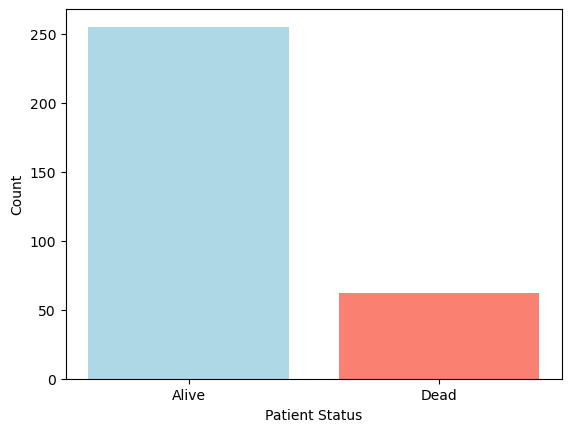

In [19]:
plt.bar(1,clean_df[(clean_df.Patient_Status==1)].count(),color='lightblue')
plt.bar(2,clean_df[(clean_df.Patient_Status==0)].count(),color='salmon')
plt.xticks(ticks=[1,2],labels=['Alive','Dead'])
plt.xlabel(xlabel='Patient Status')
plt.ylabel(ylabel='Count')
plt.show()

## Distribution of patients based on tumour stage

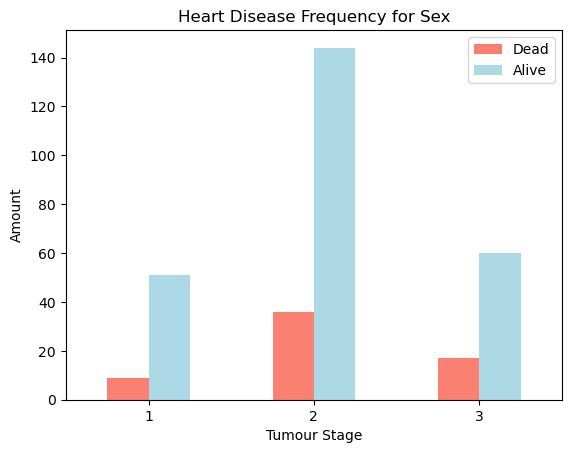

In [20]:
pd.crosstab(clean_df.Tumour_Stage,clean_df.Patient_Status).plot(kind="bar",color=["salmon", "lightblue"])

plt.title("Heart Disease Frequency for Sex")
plt.xlabel("Tumour Stage")
plt.ylabel("Amount")
plt.legend(["Dead", "Alive"]);
plt.xticks(rotation=0);



## Count of Male patients and female patients

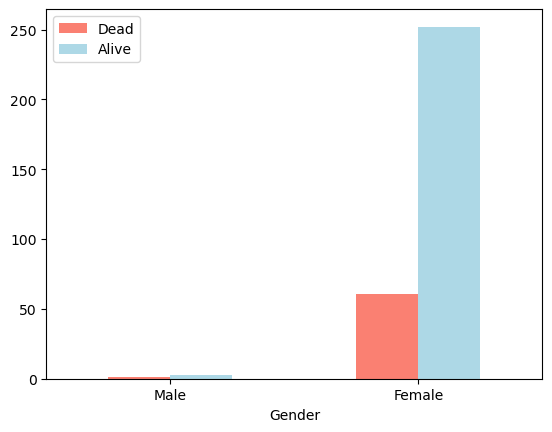

In [21]:
pd.crosstab(clean_df.Gender,clean_df.Patient_Status).plot(kind='bar',color=['salmon','lightblue'])
plt.xticks(ticks=[0,1],labels=['Male','Female'],rotation=0)
plt.legend(['Dead','Alive'])

## Scatter plot of Protein 

## Distribution of Ages


<Axes: ylabel='Frequency'>

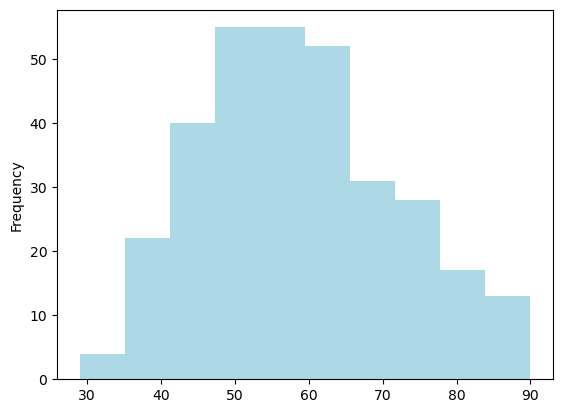

In [22]:
clean_df.Age.plot.hist(color="lightblue")

## Correlation Heatmap

In [23]:
clean_df.corr()

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,HER2 status,Patient_Status,Histology_Infiltrating Ductal Carcinoma,...,Surgery_type_Lumpectomy,Surgery_type_Modified Radical Mastectomy,Surgery_type_Other,Surgery_type_Simple Mastectomy,year of surgery,month of surgery,day of surgery,day of last visit,month of last visit,year of last visit
Age,1.000000,-0.026696,-0.044541,-0.011387,-0.047362,0.095417,-0.144483,-0.068386,0.012410,0.114405,...,0.091067,-0.098979,0.030264,-0.015960,-0.005835,-0.057515,0.050879,-0.025431,0.015392,-0.042734
Gender,-0.026696,1.000000,-0.159685,-0.000406,0.017109,0.014185,-0.033881,0.035872,0.015509,0.051302,...,0.057969,-0.055154,0.013736,-0.012587,-0.012117,-0.022536,-0.040745,0.001793,0.027693,-0.073930
Protein1,-0.044541,-0.159685,1.000000,0.223093,-0.103046,0.259171,-0.051447,-0.033544,0.019805,-0.048751,...,0.170686,-0.004985,-0.153521,0.009127,-0.038204,0.079022,0.169871,0.023211,-0.057156,-0.007361
Protein2,-0.011387,-0.000406,0.223093,1.000000,-0.407670,0.084939,-0.049881,-0.013568,-0.074810,-0.040077,...,0.103435,-0.113627,0.050176,-0.034821,0.048561,-0.018510,-0.032994,0.005440,-0.057416,0.026059
Protein3,-0.047362,0.017109,-0.103046,-0.407670,1.000000,0.076759,0.019770,-0.017628,-0.025305,0.052089,...,-0.012799,0.112797,-0.051163,-0.054277,0.041629,0.025531,-0.020352,-0.102060,0.042838,0.025183
Protein4,0.095417,0.014185,0.259171,0.084939,0.076759,1.000000,-0.050364,0.004728,-0.074876,0.000733,...,0.101073,0.023552,-0.057821,-0.061862,-0.013617,-0.046482,0.051228,-0.059025,-0.064952,-0.107517
Tumour_Stage,-0.144483,-0.033881,-0.051447,-0.049881,0.019770,-0.050364,1.000000,0.141031,-0.056747,-0.021282,...,-0.207982,0.270287,-0.002109,-0.089269,0.074549,-0.008066,-0.000798,0.012655,0.020141,-0.094306
HER2 status,-0.068386,0.035872,-0.033544,-0.013568,-0.017628,0.004728,0.141031,1.000000,0.046123,0.012206,...,0.106779,-0.003457,-0.068238,-0.025649,0.014849,0.033544,-0.002499,0.002086,0.032030,-0.058190
Patient_Status,0.012410,0.015509,0.019805,-0.074810,-0.025305,-0.074876,-0.056747,0.046123,1.000000,-0.020774,...,0.076559,0.007202,-0.086781,0.014044,0.008437,0.024285,-0.062013,0.130118,0.070580,-0.038366
Histology_Infiltrating Ductal Carcinoma,0.114405,0.051302,-0.048751,-0.040077,0.052089,0.000733,-0.021282,0.012206,-0.020774,1.000000,...,0.023255,-0.029134,-0.038227,0.052673,0.001317,0.022581,-0.023036,-0.083620,-0.010806,0.008264


(22.5, -0.5)

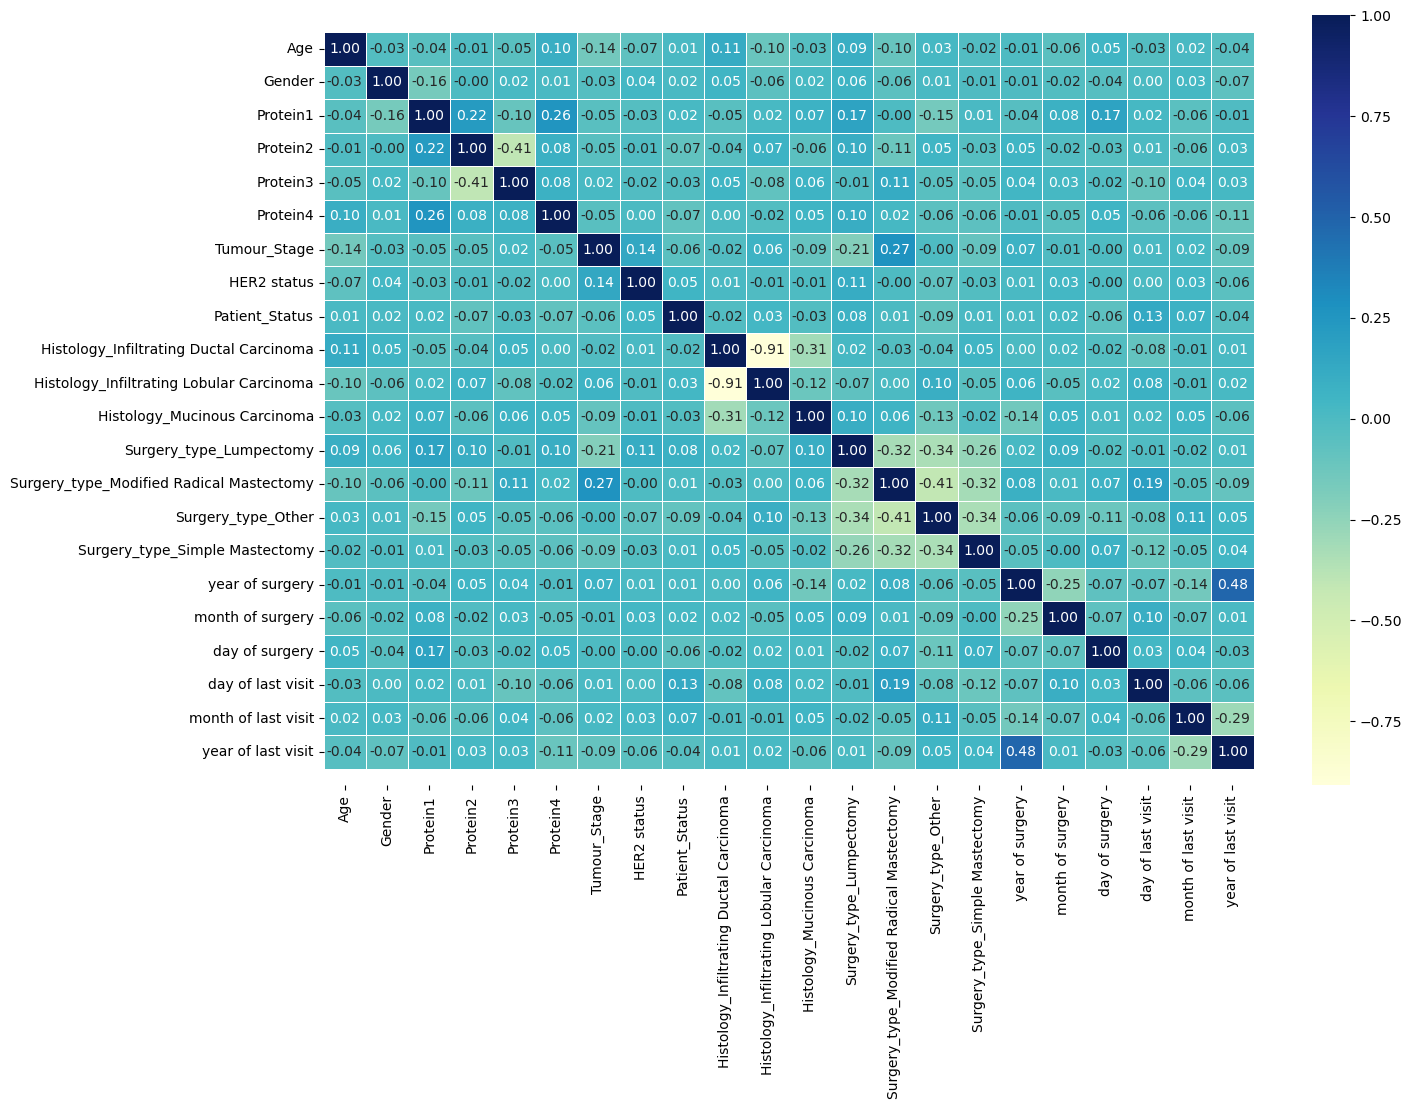

In [24]:
corr_matrix = clean_df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu"
                );
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

# Model Fitting

In [25]:
np.random.seed(42)
train, test, valid = np.split(clean_df.sample(frac=1),[int(0.75*len(clean_df)),int(0.9*len(clean_df))])
def scale_dataset(dataframe):
    standard_scaler=StandardScaler()
    X=dataframe.drop(columns=['Patient_Status','Histology_Infiltrating Lobular Carcinoma'],axis=1).values
    #X=standard_scaler.fit_transform(X)
    y=dataframe.Patient_Status.values
    return X,y
X_train, y_train = scale_dataset(train)
X_test,y_test=scale_dataset(test)
X_val,y_val=scale_dataset(valid)

In [26]:
from sklearn.metrics import classification_report

## Trying XGBoost

In [27]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

In [28]:
df.Patient_Status.sum()

255.0

In [29]:
np.random.seed(42)
xgb_classifier = XGBClassifier()
param_grid = {
    'n_estimators': [1,10,50, 100, 150,300,500,1000],
    'max_depth': [3, 5, 7,9,10],
    'learning_rate': [0.001,0.01, 0.1, 0.2,1,2,5],
    'random_state':[42]
    }
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best hyperparameters:", grid_search.best_params_)
print("Score: ", grid_search.score(X_test,y_test))

Best hyperparameters: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 10, 'random_state': 42}
Score:  0.8125


In [30]:
ratio=(len(y_train)-y_train.sum())/y_train.sum()

## The best model I've trained: Accuracy: 85%, Recall: 22%

In [31]:
np.random.seed(42)
xgbfinalmodel=XGBClassifier(n_estimators=10, learning_rate=0.2,max_depth=5,random_state=42,scale_pos_weight=1.2*(1-ratio))
xgbfinalmodel.fit(X_train,y_train,early_stopping_rounds=5,eval_set=[(X_val,y_val)],verbose=False)
y_preds=xgbfinalmodel.predict(X_test)
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

         0.0       1.00      0.22      0.36         9
         1.0       0.85      1.00      0.92        39

    accuracy                           0.85        48
   macro avg       0.92      0.61      0.64        48
weighted avg       0.88      0.85      0.81        48



In [32]:
xgbfinalmodel.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': None,
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': 0.2,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': 5,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 10,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': 42,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': 0.903157894736842,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

## Trying RandomForestClassifier

In [33]:
np.random.seed(402)
from sklearn.ensemble import RandomForestClassifier
RFC= RandomForestClassifier(max_features=100,n_estimators=100,max_depth=5)
RFC.fit(X_train,y_train)
y_preds_rfc=RFC.predict(X_test)
print(classification_report(y_test,y_preds_rfc))

              precision    recall  f1-score   support

         0.0       1.00      0.11      0.20         9
         1.0       0.83      1.00      0.91        39

    accuracy                           0.83        48
   macro avg       0.91      0.56      0.55        48
weighted avg       0.86      0.83      0.77        48



## Best model prioritising recall value:
###      Accuracy: 52%, Recall: 78%
    class_weight={0:20,1:1}

In [34]:
np.random.seed(402)
from sklearn.ensemble import RandomForestClassifier
RFC= RandomForestClassifier(max_features=100,n_estimators=100,max_depth=5,random_state=42,class_weight={0:20,1:1})
RFC.fit(X_train,y_train)
y_preds_rfc=RFC.predict(X_test)
print(classification_report(y_test,y_preds_rfc))

              precision    recall  f1-score   support

         0.0       0.25      0.78      0.38         9
         1.0       0.90      0.46      0.61        39

    accuracy                           0.52        48
   macro avg       0.57      0.62      0.49        48
weighted avg       0.78      0.52      0.57        48



In [35]:
RFC.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': {0: 20, 1: 1},
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': 100,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

## Using AdaBoost

In [36]:
from sklearn.ensemble import AdaBoostClassifier

In [37]:
np.random.seed(42)
abc=AdaBoostClassifier(n_estimators=1000,learning_rate=0.01)
abc.fit(X_train,y_train)
y_preds=abc.predict(X_test)
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         9
         1.0       0.81      1.00      0.90        39

    accuracy                           0.81        48
   macro avg       0.41      0.50      0.45        48
weighted avg       0.66      0.81      0.73        48



## Using lazypredict

In [38]:
!pip install lazypredict

In [39]:

from lazypredict.Supervised import LazyClassifier
lzp=LazyClassifier(verbose=0,ignore_warnings=True,custom_metric=None)
models,predictions = lzp.fit(X_train,X_test,y_train,y_test)

100%|██████████| 29/29 [00:01<00:00, 21.37it/s]


In [40]:
models.sort_values(by='Accuracy',ascending=False)

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
AdaBoostClassifier,0.83,0.64,0.64,0.81,0.10
DummyClassifier,0.81,0.50,0.50,0.73,0.01
LinearSVC,0.81,0.50,0.50,0.73,0.04
RandomForestClassifier,0.81,0.50,0.50,0.73,0.16
RidgeClassifier,0.81,0.50,0.50,0.73,0.02
RidgeClassifierCV,0.81,0.50,0.50,0.73,0.01
BernoulliNB,0.81,0.50,0.50,0.73,0.01
CalibratedClassifierCV,0.81,0.50,0.50,0.73,0.09
SVC,0.81,0.50,0.50,0.73,0.01


In [41]:
import tensorflow as tf

In [42]:
tf.random.set_seed(42)
reg = tf.keras.Sequential([
    tf.keras.layers.Dense(4),
    tf.keras.layers.Dense(4),
    
    tf.keras.layers.Dense(4),
    tf.keras.layers.Dense(2),
])
reg.compile(loss=tf.keras.losses.mae,optimizer=tf.keras.optimizers.Adamax(),metrics=['mae'])
reg.fit(
    X_train,y_train,epochs=1000,verbose=0)

In [43]:
y_preds1=reg.predict(X_test)

2/2 [==============================] - 0s 4ms/step


In [44]:
y_preds3=np.array(tf.transpose(y_preds1)[0])

In [45]:
for i in range(0, len(y_preds1)):
    y_preds1[i]=bool(y_preds1[i][1]>0.5)

In [46]:
y_preds1=y_preds1.astype(bool)

In [47]:
y_preds3=y_test.copy()
y_preds3=y_preds

In [48]:
print(classification_report(y_test,y_preds3))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         9
         1.0       0.81      1.00      0.90        39

    accuracy                           0.81        48
   macro avg       0.41      0.50      0.45        48
weighted avg       0.66      0.81      0.73        48



## Trying RandomOverSampling

In [49]:
from imblearn.over_sampling import RandomOverSampler

In [50]:
ros=RandomOverSampler(random_state=42)

In [51]:
X_train_resamp,y_train_resamp=ros.fit_resample(X_train,y_train)

In [52]:
xg_re=XGBClassifier(random_state=42,class_weight={0:100,1:1})
xg_re.fit(X_train_resamp,y_train_resamp)
print(classification_report(y_test,xg_re.predict(X_test)))

[17:07:30] WARNING: ../src/learner.cc:767: 
Parameters: { "class_weight" } are not used.

              precision    recall  f1-score   support

         0.0       0.20      0.11      0.14         9
         1.0       0.81      0.90      0.85        39

    accuracy                           0.75        48
   macro avg       0.51      0.50      0.50        48
weighted avg       0.70      0.75      0.72        48



## RandomUnderSampling and XGB

In [53]:
from imblearn.under_sampling import RandomUnderSampler
rus=RandomUnderSampler(random_state=42)
X_train1,y_train1=rus.fit_resample(X_train,y_train)

## Best model: 
### Accuracy:65%
### Recall: 78%

In [54]:
xg_re=XGBClassifier(random_state=42,class_weight={0:0,1:1})
xg_re.fit(X_train1,y_train1)
print(classification_report(y_test,xg_re.predict(X_test)))

[17:07:30] WARNING: ../src/learner.cc:767: 
Parameters: { "class_weight" } are not used.

              precision    recall  f1-score   support

         0.0       0.32      0.78      0.45         9
         1.0       0.92      0.62      0.74        39

    accuracy                           0.65        48
   macro avg       0.62      0.70      0.60        48
weighted avg       0.81      0.65      0.68        48



## Using SMOTE analysis

## Smote model. Accuracy:71%, Recall:67%

In [55]:
from imblearn.over_sampling import SMOTE

In [56]:
smt=SMOTE(random_state=42, k_neighbors=2, sampling_strategy='minority')

In [57]:
X_smt, y_smt= smt.fit_resample(X_train,y_train)
xg_smt=XGBClassifier(random_state=42,scale_pos_weight=0.58)
xg_smt.fit(X_smt,y_smt,early_stopping_rounds=5,eval_set=[(X_val,y_val)],verbose=False)
y_preds_smt=xg_smt.predict(X_test)
print(classification_report(y_test,y_preds_smt))

              precision    recall  f1-score   support

         0.0       0.35      0.67      0.46         9
         1.0       0.90      0.72      0.80        39

    accuracy                           0.71        48
   macro avg       0.63      0.69      0.63        48
weighted avg       0.80      0.71      0.74        48

